In [1]:
# table https://colab.research.google.com/drive/1LO7mJBnkccfwlKUFX17rJONbf_tUEukC?usp=sharing
# game Pong 18.9 (1.3)

In [2]:
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from collections import deque
from utils import DQNbn, DQN, make_env, ReplayMemory, train

%matplotlib inline

In [3]:
env = gym.make("PongNoFrameskip-v4")

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


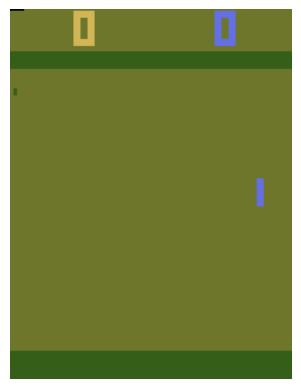

In [ ]:
plt.imshow(env.reset()[0])
plt.axis("off")  # Убрать оси координат
plt.show()

In [5]:
env.reset()

n_actions = env.action_space.n
state_dim = env.observation_space.shape

print(f"Action_space: {n_actions} \nState_space: {env.observation_space.shape}")

env.close()

Action_space: 6 
State_space: (210, 160, 3)


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [7]:
BATCH_SIZE = 32
GAMMA = 0.99
EPS_START = 1
EPS_END = 0.02
EPS_DECAY = 100000
TARGET_UPDATE = 1000
RENDER = False
lr = 1e-4
INITIAL_MEMORY = 10000
MEMORY_SIZE = 10 * INITIAL_MEMORY

In [8]:
policy_net = DQNbn(n_actions=4).to(device)  # убираем действия с FIRE
target_net = DQNbn(n_actions=4).to(device)
# policy_net = DQN(n_actions=4, in_channels=4).to(device)  # убираем действия с FIRE
# target_net = DQN(n_actions=4, in_channels=4).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = torch.optim.Adam(policy_net.parameters(), lr=lr)

steps_done = 0

# create environment
env = gym.make("PongNoFrameskip-v4")
env = make_env(env)

memory = ReplayMemory(MEMORY_SIZE)

In [9]:
train(
    model_name="pong_dqn",
    env=env,
    n_episodes=1000,
    memory=memory,
    device=device,
    initial_memory=INITIAL_MEMORY,
    policy_net=policy_net,
    target_net=target_net,
    gamma=GAMMA,
    optimizer=optimizer,
    batch_size=BATCH_SIZE,
    target_update=TARGET_UPDATE,
    eps_end=EPS_END,
    eps_start=EPS_START,
    eps_decay=EPS_DECAY,
    render=False,
)

  0%|          | 0/1000 [00:00<?, ?it/s]/home/p1dg/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/p1dg/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
  0%|          | 1/1000 [00:04<1:15:20,  4.52s/it]

Total steps: 785 	 Episode: 0/784 	 Total reward episode: -21.0 Total loss: 0.0 	 Avg_10 loss: nan 	 Avg_10 total_reward: nan  	 eps_threshold: 0.9923371161694993


  0%|          | 2/1000 [00:05<43:37,  2.62s/it]  

Total steps: 1821 	 Episode: 1/1035 	 Total reward episode: -20.0 Total loss: 0.0 	 Avg_10 loss: nan 	 Avg_10 total_reward: nan  	 eps_threshold: 0.9823157041927075


  0%|          | 3/1000 [00:07<32:59,  1.99s/it]

Total steps: 2761 	 Episode: 2/939 	 Total reward episode: -20.0 Total loss: 0.0 	 Avg_10 loss: nan 	 Avg_10 total_reward: nan  	 eps_threshold: 0.9733123187795681


  0%|          | 4/1000 [00:08<29:04,  1.75s/it]

Total steps: 3820 	 Episode: 3/1058 	 Total reward episode: -21.0 Total loss: 0.0 	 Avg_10 loss: nan 	 Avg_10 total_reward: nan  	 eps_threshold: 0.9632700092048767


  0%|          | 5/1000 [00:09<26:33,  1.60s/it]

Total steps: 4823 	 Episode: 4/1002 	 Total reward episode: -21.0 Total loss: 0.0 	 Avg_10 loss: nan 	 Avg_10 total_reward: nan  	 eps_threshold: 0.9538562996846341


  1%|          | 6/1000 [00:11<24:50,  1.50s/it]

Total steps: 5817 	 Episode: 5/993 	 Total reward episode: -19.0 Total loss: 0.0 	 Avg_10 loss: nan 	 Avg_10 total_reward: nan  	 eps_threshold: 0.9446197497690892


  1%|          | 7/1000 [00:12<23:03,  1.39s/it]

Total steps: 6694 	 Episode: 6/876 	 Total reward episode: -21.0 Total loss: 0.0 	 Avg_10 loss: nan 	 Avg_10 total_reward: nan  	 eps_threshold: 0.9365462884375969


  1%|          | 8/1000 [00:13<21:55,  1.33s/it]

Total steps: 7594 	 Episode: 7/899 	 Total reward episode: -21.0 Total loss: 0.0 	 Avg_10 loss: nan 	 Avg_10 total_reward: nan  	 eps_threshold: 0.9283343808560768


  1%|          | 9/1000 [00:14<20:32,  1.24s/it]

Total steps: 8414 	 Episode: 8/819 	 Total reward episode: -21.0 Total loss: 0.0 	 Avg_10 loss: nan 	 Avg_10 total_reward: nan  	 eps_threshold: 0.9209164938346917


  1%|          | 10/1000 [00:15<19:58,  1.21s/it]

Total steps: 9252 	 Episode: 9/837 	 Total reward episode: -20.0 Total loss: 0.0 	 Avg_10 loss: nan 	 Avg_10 total_reward: nan  	 eps_threshold: 0.9133983585993197


/home/p1dg/MFTI_DS/rl/hw_2_atari_games/utils.py:390: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  next_state_values[non_final_mask] = (
  1%|          | 11/1000 [00:18<27:57,  1.70s/it]

Total steps: 10098 	 Episode: 10/845 	 Total reward episode: -21.0 Total loss: 1.5384291397640482 	 Avg_10 loss: 1.5384291397640482 	 Avg_10 total_reward: -21.0  	 eps_threshold: 0.9058720894927634


  1%|          | 12/1000 [00:30<1:19:35,  4.83s/it]

Total steps: 11053 	 Episode: 11/954 	 Total reward episode: -20.0 Total loss: 5.066880816681078 	 Avg_10 loss: 3.302654978222563 	 Avg_10 total_reward: -20.5  	 eps_threshold: 0.8974522796224502


  1%|▏         | 13/1000 [00:41<1:50:29,  6.72s/it]

Total steps: 11898 	 Episode: 12/844 	 Total reward episode: -21.0 Total loss: 1.9002340498554986 	 Avg_10 loss: 2.8351813354335413 	 Avg_10 total_reward: -20.666666666666668  	 eps_threshold: 0.8900690459536175


  1%|▏         | 14/1000 [00:54<2:19:23,  8.48s/it]

Total steps: 12869 	 Episode: 13/970 	 Total reward episode: -20.0 Total loss: 2.0752172843785957 	 Avg_10 loss: 2.645190322669805 	 Avg_10 total_reward: -20.5  	 eps_threshold: 0.8816615599196866


  2%|▏         | 15/1000 [01:04<2:29:23,  9.10s/it]

Total steps: 13673 	 Episode: 14/803 	 Total reward episode: -21.0 Total loss: 1.5697403311933158 	 Avg_10 loss: 2.430100324374507 	 Avg_10 total_reward: -20.6  	 eps_threshold: 0.8747615760817538


  2%|▏         | 16/1000 [01:15<2:36:38,  9.55s/it]

Total steps: 14490 	 Episode: 15/816 	 Total reward episode: -21.0 Total loss: 1.7281581927090883 	 Avg_10 loss: 2.3131099690969372 	 Avg_10 total_reward: -20.666666666666668  	 eps_threshold: 0.8678066236720018


  2%|▏         | 17/1000 [01:27<2:48:47, 10.30s/it]

Total steps: 15431 	 Episode: 16/940 	 Total reward episode: -21.0 Total loss: 1.7731696577684488 	 Avg_10 loss: 2.2359756389071532 	 Avg_10 total_reward: -20.714285714285715  	 eps_threshold: 0.8598661817151562


  2%|▏         | 18/1000 [01:38<2:54:11, 10.64s/it]

Total steps: 16283 	 Episode: 17/851 	 Total reward episode: -21.0 Total loss: 1.7360161568358308 	 Avg_10 loss: 2.173480703648238 	 Avg_10 total_reward: -20.75  	 eps_threshold: 0.852740918570031


  2%|▏         | 19/1000 [01:51<3:02:46, 11.18s/it]

Total steps: 17248 	 Episode: 18/964 	 Total reward episode: -21.0 Total loss: 1.8761331008281559 	 Avg_10 loss: 2.140442081112673 	 Avg_10 total_reward: -20.77777777777778  	 eps_threshold: 0.844743617742945


  2%|▏         | 20/1000 [02:01<2:58:26, 10.93s/it]

Total steps: 18065 	 Episode: 19/816 	 Total reward episode: -21.0 Total loss: 1.4759411009581527 	 Avg_10 loss: 2.0739919830972213 	 Avg_10 total_reward: -20.8  	 eps_threshold: 0.8380329129427329


  2%|▏         | 21/1000 [02:15<3:11:16, 11.72s/it]

Total steps: 19123 	 Episode: 20/1057 	 Total reward episode: -20.0 Total loss: 2.2085922729456797 	 Avg_10 loss: 2.1410082964153845 	 Avg_10 total_reward: -20.7  	 eps_threshold: 0.8294237475153419


  2%|▏         | 22/1000 [02:29<3:24:32, 12.55s/it]

Total steps: 20229 	 Episode: 21/1105 	 Total reward episode: -19.0 Total loss: 2.368584072464728 	 Avg_10 loss: 1.8711786219937494 	 Avg_10 total_reward: -20.6  	 eps_threshold: 0.8205208446732809


  2%|▏         | 23/1000 [02:39<3:14:03, 11.92s/it]

Total steps: 21032 	 Episode: 22/802 	 Total reward episode: -21.0 Total loss: 1.6483720299438573 	 Avg_10 loss: 1.8459924200025852 	 Avg_10 total_reward: -20.6  	 eps_threshold: 0.8141184024987843


  2%|▏         | 24/1000 [02:54<3:24:26, 12.57s/it]

Total steps: 22121 	 Episode: 23/1088 	 Total reward episode: -21.0 Total loss: 2.3383416136784945 	 Avg_10 loss: 1.8723048529325752 	 Avg_10 total_reward: -20.7  	 eps_threshold: 0.8055173707146707


  2%|▎         | 25/1000 [03:07<3:29:35, 12.90s/it]

Total steps: 23142 	 Episode: 24/1020 	 Total reward episode: -20.0 Total loss: 2.282000456325477 	 Avg_10 loss: 1.9435308654457912 	 Avg_10 total_reward: -20.6  	 eps_threshold: 0.7975380421483783


  3%|▎         | 26/1000 [03:23<3:42:37, 13.71s/it]

Total steps: 24264 	 Episode: 25/1121 	 Total reward episode: -19.0 Total loss: 2.59927889413666 	 Avg_10 loss: 2.0306429355885482 	 Avg_10 total_reward: -20.4  	 eps_threshold: 0.7888628242965392


  3%|▎         | 27/1000 [03:34<3:30:51, 13.00s/it]

Total steps: 25153 	 Episode: 26/888 	 Total reward episode: -20.0 Total loss: 2.0753255735035054 	 Avg_10 loss: 2.060858527162054 	 Avg_10 total_reward: -20.3  	 eps_threshold: 0.7820579263768515


  3%|▎         | 28/1000 [03:47<3:27:37, 12.82s/it]

Total steps: 26118 	 Episode: 27/964 	 Total reward episode: -21.0 Total loss: 2.334031665319344 	 Avg_10 loss: 2.1206600780104052 	 Avg_10 total_reward: -20.3  	 eps_threshold: 0.7747394358968036


  3%|▎         | 29/1000 [04:00<3:31:32, 13.07s/it]

Total steps: 27124 	 Episode: 28/1005 	 Total reward episode: -20.0 Total loss: 2.7325794979406055 	 Avg_10 loss: 2.2063047177216504 	 Avg_10 total_reward: -20.2  	 eps_threshold: 0.7671848205993758


  3%|▎         | 30/1000 [04:14<3:34:31, 13.27s/it]

Total steps: 28122 	 Episode: 29/997 	 Total reward episode: -21.0 Total loss: 2.7537946295924485 	 Avg_10 loss: 2.33409007058508 	 Avg_10 total_reward: -20.2  	 eps_threshold: 0.7597650025664133


  3%|▎         | 31/1000 [04:29<3:41:53, 13.74s/it]

Total steps: 29195 	 Episode: 30/1072 	 Total reward episode: -19.0 Total loss: 3.762686902686255 	 Avg_10 loss: 2.4894995335591377 	 Avg_10 total_reward: -20.1  	 eps_threshold: 0.7518697578269594


  3%|▎         | 32/1000 [04:44<3:49:14, 14.21s/it]

Total steps: 30271 	 Episode: 31/1075 	 Total reward episode: -20.0 Total loss: 7.6909314970253035 	 Avg_10 loss: 3.021734276015195 	 Avg_10 total_reward: -20.2  	 eps_threshold: 0.744037054746134


  3%|▎         | 33/1000 [05:00<3:55:07, 14.59s/it]

Total steps: 31362 	 Episode: 32/1090 	 Total reward episode: -20.0 Total loss: 6.9155314092640765 	 Avg_10 loss: 3.548450213947217 	 Avg_10 total_reward: -20.1  	 eps_threshold: 0.7361807445774751


  3%|▎         | 34/1000 [05:20<4:23:35, 16.37s/it]

Total steps: 32866 	 Episode: 33/1503 	 Total reward episode: -18.0 Total loss: 7.217482102278154 	 Avg_10 loss: 4.036364262807183 	 Avg_10 total_reward: -19.8  	 eps_threshold: 0.7254899822333933


  4%|▎         | 35/1000 [05:39<4:33:30, 17.01s/it]

Total steps: 34142 	 Episode: 34/1275 	 Total reward episode: -20.0 Total loss: 6.448888847604394 	 Avg_10 loss: 4.453053101935074 	 Avg_10 total_reward: -19.8  	 eps_threshold: 0.716545119648148


  4%|▎         | 36/1000 [05:55<4:32:35, 16.97s/it]

Total steps: 35288 	 Episode: 35/1145 	 Total reward episode: -21.0 Total loss: 4.008131194743328 	 Avg_10 loss: 4.593938331995742 	 Avg_10 total_reward: -20.0  	 eps_threshold: 0.7086082775452208


  4%|▎         | 37/1000 [06:21<5:14:58, 19.62s/it]

Total steps: 37085 	 Episode: 36/1796 	 Total reward episode: -19.0 Total loss: 6.224507595296018 	 Avg_10 loss: 5.008856534174993 	 Avg_10 total_reward: -19.9  	 eps_threshold: 0.6963445067951373


  4%|▍         | 38/1000 [06:36<4:53:13, 18.29s/it]

Total steps: 38171 	 Episode: 37/1085 	 Total reward episode: -21.0 Total loss: 3.9991635887417942 	 Avg_10 loss: 5.175369726517237 	 Avg_10 total_reward: -19.9  	 eps_threshold: 0.6890391453630609


  4%|▍         | 39/1000 [06:58<5:09:08, 19.30s/it]

Total steps: 39737 	 Episode: 38/1565 	 Total reward episode: -16.0 Total loss: 5.513590523740277 	 Avg_10 loss: 5.4534708290972045 	 Avg_10 total_reward: -19.5  	 eps_threshold: 0.6786436018975865


  4%|▍         | 40/1000 [07:18<5:09:31, 19.35s/it]

Total steps: 41219 	 Episode: 39/1481 	 Total reward episode: -19.0 Total loss: 4.859774122654926 	 Avg_10 loss: 5.664068778403452 	 Avg_10 total_reward: -19.3  	 eps_threshold: 0.668954477465991


  4%|▍         | 41/1000 [07:34<4:57:07, 18.59s/it]

Total steps: 42491 	 Episode: 40/1271 	 Total reward episode: -20.0 Total loss: 3.9514038378256373 	 Avg_10 loss: 5.682940471917391 	 Avg_10 total_reward: -19.4  	 eps_threshold: 0.6607520545171889


  4%|▍         | 42/1000 [07:51<4:49:03, 18.10s/it]

Total steps: 43735 	 Episode: 41/1243 	 Total reward episode: -21.0 Total loss: 4.122604639851488 	 Avg_10 loss: 5.3261077862000095 	 Avg_10 total_reward: -19.5  	 eps_threshold: 0.65283047335135


  4%|▍         | 43/1000 [08:08<4:42:07, 17.69s/it]

Total steps: 44939 	 Episode: 42/1203 	 Total reward episode: -18.0 Total loss: 4.114051876356825 	 Avg_10 loss: 5.0459598329092845 	 Avg_10 total_reward: -19.3  	 eps_threshold: 0.6452568789801233


  4%|▍         | 44/1000 [08:29<4:55:32, 18.55s/it]

Total steps: 46404 	 Episode: 43/1464 	 Total reward episode: -17.0 Total loss: 5.14010114048142 	 Avg_10 loss: 4.8382217367296105 	 Avg_10 total_reward: -19.2  	 eps_threshold: 0.6361636363393653


  4%|▍         | 45/1000 [08:48<4:59:35, 18.82s/it]

Total steps: 47849 	 Episode: 44/1444 	 Total reward episode: -20.0 Total loss: 4.634845994121861 	 Avg_10 loss: 4.656817451381357 	 Avg_10 total_reward: -19.2  	 eps_threshold: 0.627324091316442


  5%|▍         | 46/1000 [09:10<5:15:01, 19.81s/it]

Total steps: 49446 	 Episode: 45/1596 	 Total reward episode: -21.0 Total loss: 5.945758123125415 	 Avg_10 loss: 4.850580144219566 	 Avg_10 total_reward: -19.2  	 eps_threshold: 0.6177021611881336


  5%|▍         | 47/1000 [09:38<5:53:09, 22.23s/it]

Total steps: 51439 	 Episode: 46/1992 	 Total reward episode: -20.0 Total loss: 8.031551562715322 	 Avg_10 loss: 5.031284540961496 	 Avg_10 total_reward: -19.3  	 eps_threshold: 0.6059078775451763


  5%|▍         | 48/1000 [10:01<5:54:11, 22.32s/it]

Total steps: 52988 	 Episode: 47/1548 	 Total reward episode: -18.0 Total loss: 6.19766280654585 	 Avg_10 loss: 5.251134462741902 	 Avg_10 total_reward: -19.0  	 eps_threshold: 0.596902094382585


  5%|▍         | 49/1000 [10:23<5:55:54, 22.45s/it]

Total steps: 54597 	 Episode: 48/1608 	 Total reward episode: -19.0 Total loss: 7.48574774939334 	 Avg_10 loss: 5.448350185307208 	 Avg_10 total_reward: -19.3  	 eps_threshold: 0.5876940173182262


  5%|▌         | 50/1000 [10:46<5:55:12, 22.43s/it]

Total steps: 56129 	 Episode: 49/1531 	 Total reward episode: -19.0 Total loss: 7.253083486924879 	 Avg_10 loss: 5.687681121734204 	 Avg_10 total_reward: -19.3  	 eps_threshold: 0.5790632256421163


  5%|▌         | 51/1000 [11:05<5:41:13, 21.57s/it]

Total steps: 57542 	 Episode: 50/1412 	 Total reward episode: -17.0 Total loss: 6.722470864304341 	 Avg_10 loss: 5.964787824382074 	 Avg_10 total_reward: -19.0  	 eps_threshold: 0.5712192107379651


  5%|▌         | 52/1000 [11:32<6:03:10, 22.99s/it]

Total steps: 59453 	 Episode: 51/1910 	 Total reward episode: -17.0 Total loss: 7.969056376838125 	 Avg_10 loss: 6.349432998080738 	 Avg_10 total_reward: -18.6  	 eps_threshold: 0.56078542397935


  5%|▌         | 53/1000 [11:54<5:58:55, 22.74s/it]

Total steps: 61056 	 Episode: 52/1602 	 Total reward episode: -19.0 Total loss: 7.028816606500186 	 Avg_10 loss: 6.640909471095074 	 Avg_10 total_reward: -18.7  	 eps_threshold: 0.5521857442139464


  5%|▌         | 54/1000 [12:17<6:03:01, 23.02s/it]

Total steps: 62796 	 Episode: 53/1739 	 Total reward episode: -16.0 Total loss: 8.13565940852277 	 Avg_10 loss: 6.940465297899209 	 Avg_10 total_reward: -18.6  	 eps_threshold: 0.543005809306904


  6%|▌         | 55/1000 [12:42<6:07:40, 23.34s/it]

Total steps: 64557 	 Episode: 54/1760 	 Total reward episode: -20.0 Total loss: 8.915421929617878 	 Avg_10 loss: 7.36852289144881 	 Avg_10 total_reward: -18.6  	 eps_threshold: 0.5338762982793738


  6%|▌         | 56/1000 [13:05<6:05:53, 23.26s/it]

Total steps: 66209 	 Episode: 55/1651 	 Total reward episode: -17.0 Total loss: 9.586749922658782 	 Avg_10 loss: 7.732622071402147 	 Avg_10 total_reward: -18.2  	 eps_threshold: 0.5254567983808466


  6%|▌         | 57/1000 [13:30<6:16:39, 23.97s/it]

Total steps: 68009 	 Episode: 56/1799 	 Total reward episode: -18.0 Total loss: 9.898871286888607 	 Avg_10 loss: 7.919354043819476 	 Avg_10 total_reward: -18.0  	 eps_threshold: 0.5164399709102536


  6%|▌         | 58/1000 [13:51<5:59:26, 22.89s/it]

Total steps: 69492 	 Episode: 57/1482 	 Total reward episode: -20.0 Total loss: 8.363980277616065 	 Avg_10 loss: 8.135985790926497 	 Avg_10 total_reward: -18.2  	 eps_threshold: 0.5091320880272945


  6%|▌         | 59/1000 [14:11<5:45:41, 22.04s/it]

Total steps: 70969 	 Episode: 58/1476 	 Total reward episode: -19.0 Total loss: 7.7875330375973135 	 Avg_10 loss: 8.166164319746894 	 Avg_10 total_reward: -18.2  	 eps_threshold: 0.5019606981723604


  6%|▌         | 60/1000 [14:40<6:18:57, 24.19s/it]

Total steps: 73105 	 Episode: 59/2135 	 Total reward episode: -18.0 Total loss: 10.79504028201336 	 Avg_10 loss: 8.520359999255742 	 Avg_10 total_reward: -18.1  	 eps_threshold: 0.4917751861857849


  6%|▌         | 61/1000 [15:08<6:35:30, 25.27s/it]

Total steps: 75139 	 Episode: 60/2033 	 Total reward episode: -18.0 Total loss: 10.410384112561587 	 Avg_10 loss: 8.889151324081467 	 Avg_10 total_reward: -18.2  	 eps_threshold: 0.4822762109640326


  6%|▌         | 62/1000 [15:42<7:17:10, 27.96s/it]

Total steps: 77652 	 Episode: 61/2512 	 Total reward episode: -17.0 Total loss: 12.169285230629612 	 Avg_10 loss: 9.309174209460616 	 Avg_10 total_reward: -18.2  	 eps_threshold: 0.470803962323561


  6%|▋         | 63/1000 [16:09<7:13:16, 27.74s/it]

Total steps: 79639 	 Episode: 62/1986 	 Total reward episode: -17.0 Total loss: 9.445464634161908 	 Avg_10 loss: 9.550839012226788 	 Avg_10 total_reward: -18.0  	 eps_threshold: 0.46193489359296197


  6%|▋         | 64/1000 [16:40<7:27:50, 28.71s/it]

Total steps: 81823 	 Episode: 63/2183 	 Total reward episode: -16.0 Total loss: 9.31834005418932 	 Avg_10 loss: 9.669107076793443 	 Avg_10 total_reward: -18.0  	 eps_threshold: 0.45238767067875224


  6%|▋         | 65/1000 [17:11<7:36:03, 29.27s/it]

Total steps: 84041 	 Episode: 64/2217 	 Total reward episode: -19.0 Total loss: 8.646660858707037 	 Avg_10 loss: 9.642230969702359 	 Avg_10 total_reward: -17.9  	 eps_threshold: 0.44290288722688914


  7%|▋         | 66/1000 [17:38<7:26:43, 28.70s/it]

Total steps: 86013 	 Episode: 65/1971 	 Total reward episode: -19.0 Total loss: 7.468080704507884 	 Avg_10 loss: 9.43036404788727 	 Avg_10 total_reward: -18.1  	 eps_threshold: 0.43464493332615994


  7%|▋         | 67/1000 [18:02<7:04:00, 27.27s/it]

Total steps: 87736 	 Episode: 66/1722 	 Total reward episode: -20.0 Total loss: 6.325375593616627 	 Avg_10 loss: 9.073014478560072 	 Avg_10 total_reward: -18.3  	 eps_threshold: 0.42756179757119983


  7%|▋         | 68/1000 [18:35<7:30:55, 29.03s/it]

Total steps: 90188 	 Episode: 67/2451 	 Total reward episode: -17.0 Total loss: 9.615702562383376 	 Avg_10 loss: 9.198186707036802 	 Avg_10 total_reward: -18.0  	 eps_threshold: 0.4176899062837444


  7%|▋         | 69/1000 [19:01<7:17:50, 28.22s/it]

Total steps: 92104 	 Episode: 68/1915 	 Total reward episode: -19.0 Total loss: 7.555084344756324 	 Avg_10 loss: 9.174941837752703 	 Avg_10 total_reward: -18.0  	 eps_threshold: 0.4101427007916661


  7%|▋         | 70/1000 [19:28<7:11:06, 27.81s/it]

Total steps: 94006 	 Episode: 69/1901 	 Total reward episode: -18.0 Total loss: 7.835428857069928 	 Avg_10 loss: 8.87898069525836 	 Avg_10 total_reward: -18.0  	 eps_threshold: 0.4027923104236853


  7%|▋         | 71/1000 [19:59<7:22:43, 28.59s/it]

Total steps: 96170 	 Episode: 70/2163 	 Total reward episode: -16.0 Total loss: 8.22959053365048 	 Avg_10 loss: 8.66090133736725 	 Avg_10 total_reward: -17.8  	 eps_threshold: 0.3945976706150667


  7%|▋         | 72/1000 [20:27<7:19:08, 28.39s/it]

Total steps: 98146 	 Episode: 71/1975 	 Total reward episode: -18.0 Total loss: 7.677425833593588 	 Avg_10 loss: 8.211715397663648 	 Avg_10 total_reward: -17.9  	 eps_threshold: 0.3872682735698659


  7%|▋         | 73/1000 [20:54<7:15:47, 28.21s/it]

Total steps: 100094 	 Episode: 72/1947 	 Total reward episode: -15.0 Total loss: 7.137110526673496 	 Avg_10 loss: 7.980879986914806 	 Avg_10 total_reward: -17.7  	 eps_threshold: 0.3801831210354652


  7%|▋         | 74/1000 [21:35<8:14:42, 32.05s/it]

Total steps: 102667 	 Episode: 73/2572 	 Total reward episode: -17.0 Total loss: 9.666790739749558 	 Avg_10 loss: 8.01572505547083 	 Avg_10 total_reward: -17.8  	 eps_threshold: 0.3710338198469764


  8%|▊         | 75/1000 [22:09<8:18:56, 32.36s/it]

Total steps: 104772 	 Episode: 74/2104 	 Total reward episode: -15.0 Total loss: 7.144697009061929 	 Avg_10 loss: 7.865528670506319 	 Avg_10 total_reward: -17.4  	 eps_threshold: 0.36372178708040503


  8%|▊         | 76/1000 [22:49<8:53:36, 34.65s/it]

Total steps: 107347 	 Episode: 75/2574 	 Total reward episode: -12.0 Total loss: 8.215698395913932 	 Avg_10 loss: 7.940290439646924 	 Avg_10 total_reward: -16.7  	 eps_threshold: 0.35498393373152315


  8%|▊         | 77/1000 [23:15<8:15:44, 32.23s/it]

Total steps: 109064 	 Episode: 76/1716 	 Total reward episode: -20.0 Total loss: 5.552261216565967 	 Avg_10 loss: 7.8629790019418575 	 Avg_10 total_reward: -16.7  	 eps_threshold: 0.34928135631334756


  8%|▊         | 78/1000 [23:55<8:48:25, 34.39s/it]

Total steps: 111609 	 Episode: 77/2544 	 Total reward episode: -13.0 Total loss: 8.403069808031432 	 Avg_10 loss: 7.741715726506664 	 Avg_10 total_reward: -16.3  	 eps_threshold: 0.341006885053444


  8%|▊         | 79/1000 [24:26<8:35:40, 33.59s/it]

Total steps: 113619 	 Episode: 78/2009 	 Total reward episode: -18.0 Total loss: 6.65885100219748 	 Avg_10 loss: 7.652092392250779 	 Avg_10 total_reward: -16.2  	 eps_threshold: 0.334619059372635


  8%|▊         | 80/1000 [25:07<9:06:45, 35.66s/it]

Total steps: 116249 	 Episode: 79/2629 	 Total reward episode: -17.0 Total loss: 9.290723404439632 	 Avg_10 loss: 7.79762184698775 	 Avg_10 total_reward: -16.1  	 eps_threshold: 0.32645243988275296


  8%|▊         | 81/1000 [25:43<9:09:35, 35.88s/it]

Total steps: 118591 	 Episode: 80/2341 	 Total reward episode: -12.0 Total loss: 9.180682466365397 	 Avg_10 loss: 7.892731040259241 	 Avg_10 total_reward: -15.7  	 eps_threshold: 0.31935871549055844


  8%|▊         | 82/1000 [26:21<9:18:19, 36.49s/it]

Total steps: 121018 	 Episode: 81/2426 	 Total reward episode: -14.0 Total loss: 9.392631079594139 	 Avg_10 loss: 8.064251564859296 	 Avg_10 total_reward: -15.3  	 eps_threshold: 0.3121807365750942


  8%|▊         | 83/1000 [27:07<10:01:19, 39.35s/it]

Total steps: 123993 	 Episode: 82/2974 	 Total reward episode: -11.0 Total loss: 10.756944557186216 	 Avg_10 loss: 8.426234967910569 	 Avg_10 total_reward: -14.9  	 eps_threshold: 0.303616386032448


  8%|▊         | 84/1000 [27:51<10:20:28, 40.64s/it]

Total steps: 126777 	 Episode: 83/2783 	 Total reward episode: -12.0 Total loss: 10.819544395373669 	 Avg_10 loss: 8.54151033347298 	 Avg_10 total_reward: -14.4  	 eps_threshold: 0.29582940358630977


  8%|▊         | 85/1000 [28:22<9:35:37, 37.75s/it] 

Total steps: 128750 	 Episode: 84/1972 	 Total reward episode: -15.0 Total loss: 7.774622654629638 	 Avg_10 loss: 8.60450289802975 	 Avg_10 total_reward: -14.4  	 eps_threshold: 0.29044062456625364


  9%|▊         | 86/1000 [29:06<10:04:55, 39.71s/it]

Total steps: 131552 	 Episode: 85/2801 	 Total reward episode: -12.0 Total loss: 11.471235376026016 	 Avg_10 loss: 8.93005659604096 	 Avg_10 total_reward: -14.4  	 eps_threshold: 0.2829680578249381


  9%|▊         | 87/1000 [30:05<11:30:16, 45.36s/it]

Total steps: 135315 	 Episode: 86/3762 	 Total reward episode: -11.0 Total loss: 15.128707369149197 	 Avg_10 loss: 9.887701211299282 	 Avg_10 total_reward: -13.5  	 eps_threshold: 0.2732564398585754


  9%|▉         | 88/1000 [30:43<10:58:25, 43.32s/it]

Total steps: 137766 	 Episode: 87/2450 	 Total reward episode: -14.0 Total loss: 10.084851688006893 	 Avg_10 loss: 10.055879399296828 	 Avg_10 total_reward: -13.6  	 eps_threshold: 0.2671245774595706


  9%|▉         | 89/1000 [31:31<11:20:09, 44.80s/it]

Total steps: 140803 	 Episode: 88/3036 	 Total reward episode: -13.0 Total loss: 12.571110979828518 	 Avg_10 loss: 10.647105397059931 	 Avg_10 total_reward: -13.1  	 eps_threshold: 0.25973222509072424


  9%|▉         | 90/1000 [32:13<11:05:28, 43.88s/it]

Total steps: 143529 	 Episode: 89/2725 	 Total reward episode: -15.0 Total loss: 12.248569858493283 	 Avg_10 loss: 10.942890042465297 	 Avg_10 total_reward: -12.9  	 eps_threshold: 0.2532853941594879


  9%|▉         | 91/1000 [32:55<10:56:32, 43.34s/it]

Total steps: 146087 	 Episode: 90/2557 	 Total reward episode: -15.0 Total loss: 10.94628197728889 	 Avg_10 loss: 11.119449993557646 	 Avg_10 total_reward: -13.2  	 eps_threshold: 0.24739363069437803


  9%|▉         | 92/1000 [33:49<11:44:19, 46.54s/it]

Total steps: 149497 	 Episode: 91/3409 	 Total reward episode: -12.0 Total loss: 12.87045964866411 	 Avg_10 loss: 11.467232850464644 	 Avg_10 total_reward: -13.0  	 eps_threshold: 0.23977022564379835


  9%|▉         | 93/1000 [34:53<13:03:12, 51.81s/it]

Total steps: 153266 	 Episode: 92/3768 	 Total reward episode: -10.0 Total loss: 13.942032831837423 	 Avg_10 loss: 11.785741677929764 	 Avg_10 total_reward: -12.9  	 eps_threshold: 0.23164123886560117


  9%|▉         | 94/1000 [35:44<12:57:01, 51.46s/it]

Total steps: 156390 	 Episode: 93/3123 	 Total reward episode: -11.0 Total loss: 11.868555997381918 	 Avg_10 loss: 11.890642838130589 	 Avg_10 total_reward: -12.8  	 eps_threshold: 0.2251317738017686


 10%|▉         | 95/1000 [36:19<11:43:18, 46.63s/it]

Total steps: 158528 	 Episode: 94/2137 	 Total reward episode: -14.0 Total loss: 7.656437079946045 	 Avg_10 loss: 11.87882428066223 	 Avg_10 total_reward: -12.7  	 eps_threshold: 0.2207926074525697


 10%|▉         | 96/1000 [37:02<11:23:09, 45.34s/it]

Total steps: 161257 	 Episode: 95/2728 	 Total reward episode: -13.0 Total loss: 11.392161527997814 	 Avg_10 loss: 11.87091689585941 	 Avg_10 total_reward: -12.8  	 eps_threshold: 0.2153870712114701


 10%|▉         | 97/1000 [37:57<12:07:20, 48.33s/it]

Total steps: 164857 	 Episode: 96/3599 	 Total reward episode: -9.0 Total loss: 14.793327708088327 	 Avg_10 loss: 11.837378929753323 	 Avg_10 total_reward: -12.6  	 eps_threshold: 0.20847824171624038


 10%|▉         | 98/1000 [38:49<12:23:38, 49.47s/it]

Total steps: 168357 	 Episode: 97/3499 	 Total reward episode: -9.0 Total loss: 12.507744198403088 	 Avg_10 loss: 12.079668180792941 	 Avg_10 total_reward: -12.1  	 eps_threshold: 0.20199561104790456


 10%|▉         | 99/1000 [39:46<12:55:11, 51.62s/it]

Total steps: 172279 	 Episode: 98/3921 	 Total reward episode: -7.0 Total loss: 13.110258398897713 	 Avg_10 loss: 12.133582922699862 	 Avg_10 total_reward: -11.5  	 eps_threshold: 0.1949959046526135


 10%|█         | 100/1000 [40:29<12:15:05, 49.01s/it]

Total steps: 175197 	 Episode: 99/2917 	 Total reward episode: -12.0 Total loss: 9.326070571230957 	 Avg_10 loss: 11.841332993973628 	 Avg_10 total_reward: -11.2  	 eps_threshold: 0.189963306844974


 10%|█         | 101/1000 [41:14<11:57:50, 47.91s/it]

Total steps: 178300 	 Episode: 100/3102 	 Total reward episode: -8.0 Total loss: 10.194850099767791 	 Avg_10 loss: 11.766189806221519 	 Avg_10 total_reward: -10.5  	 eps_threshold: 0.1847703311213466


 10%|█         | 102/1000 [42:08<12:26:26, 49.87s/it]

Total steps: 181972 	 Episode: 101/3671 	 Total reward episode: -8.0 Total loss: 12.826526143006049 	 Avg_10 loss: 11.761796455655713 	 Avg_10 total_reward: -10.1  	 eps_threshold: 0.1788297020062216


 10%|█         | 103/1000 [42:55<12:11:55, 48.96s/it]

Total steps: 184956 	 Episode: 102/2983 	 Total reward episode: -8.0 Total loss: 11.814400104776723 	 Avg_10 loss: 11.549033182949643 	 Avg_10 total_reward: -9.9  	 eps_threshold: 0.17416023857180396


 10%|█         | 104/1000 [43:55<12:58:36, 52.14s/it]

Total steps: 188635 	 Episode: 103/3678 	 Total reward episode: -6.0 Total loss: 16.059888170449995 	 Avg_10 loss: 11.96816640025645 	 Avg_10 total_reward: -9.4  	 eps_threshold: 0.16859174392136902


 10%|█         | 105/1000 [44:47<12:59:55, 52.29s/it]

Total steps: 191982 	 Episode: 104/3346 	 Total reward episode: -14.0 Total loss: 13.610154479218181 	 Avg_10 loss: 12.563538140183663 	 Avg_10 total_reward: -9.4  	 eps_threshold: 0.1637006866835347


 11%|█         | 106/1000 [45:35<12:39:43, 50.99s/it]

Total steps: 195109 	 Episode: 105/3126 	 Total reward episode: -5.0 Total loss: 11.708995246968698 	 Avg_10 loss: 12.595221512080752 	 Avg_10 total_reward: -8.6  	 eps_threshold: 0.15927669578898276


 11%|█         | 107/1000 [46:33<13:08:36, 52.99s/it]

Total steps: 198778 	 Episode: 106/3668 	 Total reward episode: -7.0 Total loss: 15.309061890264275 	 Avg_10 loss: 12.646794930298347 	 Avg_10 total_reward: -8.4  	 eps_threshold: 0.1542592418565982


 11%|█         | 108/1000 [47:21<12:45:33, 51.49s/it]

Total steps: 201803 	 Episode: 107/3024 	 Total reward episode: -8.0 Total loss: 14.314198396983556 	 Avg_10 loss: 12.827440350156394 	 Avg_10 total_reward: -8.3  	 eps_threshold: 0.15025871284820858


 11%|█         | 109/1000 [48:12<12:41:03, 51.25s/it]

Total steps: 205103 	 Episode: 108/3299 	 Total reward episode: -7.0 Total loss: 14.103031224862207 	 Avg_10 loss: 12.926717632752844 	 Avg_10 total_reward: -8.3  	 eps_threshold: 0.1460303274030771


 11%|█         | 110/1000 [48:57<12:12:35, 49.39s/it]

Total steps: 208073 	 Episode: 109/2969 	 Total reward episode: -7.0 Total loss: 11.86357144068461 	 Avg_10 loss: 13.180467719698209 	 Avg_10 total_reward: -7.8  	 eps_threshold: 0.1423422654947693


 11%|█         | 111/1000 [49:49<12:24:54, 50.28s/it]

Total steps: 211506 	 Episode: 110/3432 	 Total reward episode: -3.0 Total loss: 14.700933392450679 	 Avg_10 loss: 13.631076048966497 	 Avg_10 total_reward: -7.3  	 eps_threshold: 0.13821353073746223


 11%|█         | 112/1000 [50:31<11:45:55, 47.70s/it]

Total steps: 214186 	 Episode: 111/2679 	 Total reward episode: -9.0 Total loss: 11.071597239468247 	 Avg_10 loss: 13.455583158612717 	 Avg_10 total_reward: -7.4  	 eps_threshold: 0.13508748423884315


 11%|█▏        | 113/1000 [51:31<12:38:34, 51.31s/it]

Total steps: 218024 	 Episode: 112/3837 	 Total reward episode: -7.0 Total loss: 14.18469425389776 	 Avg_10 loss: 13.692612573524821 	 Avg_10 total_reward: -7.3  	 eps_threshold: 0.13075411584986316


 11%|█▏        | 114/1000 [52:28<13:03:18, 53.05s/it]

Total steps: 221773 	 Episode: 113/3748 	 Total reward episode: -8.0 Total loss: 13.037032439082395 	 Avg_10 loss: 13.39032700038806 	 Avg_10 total_reward: -7.5  	 eps_threshold: 0.12667881290898855


 12%|█▏        | 115/1000 [53:19<12:54:41, 52.52s/it]

Total steps: 225140 	 Episode: 114/3366 	 Total reward episode: -9.0 Total loss: 13.01062025455758 	 Avg_10 loss: 13.330373577922 	 Avg_10 total_reward: -7.0  	 eps_threshold: 0.12314673351272146


 12%|█▏        | 116/1000 [54:14<13:04:36, 53.25s/it]

Total steps: 228718 	 Episode: 115/3577 	 Total reward episode: -8.0 Total loss: 13.36038534383988 	 Avg_10 loss: 13.495512587609118 	 Avg_10 total_reward: -7.3  	 eps_threshold: 0.11952138758456471


 12%|█▏        | 117/1000 [55:00<12:31:04, 51.04s/it]

Total steps: 231636 	 Episode: 116/2917 	 Total reward episode: -11.0 Total loss: 10.23750969878165 	 Avg_10 loss: 12.988357368460857 	 Avg_10 total_reward: -7.7  	 eps_threshold: 0.11665931422367341


 12%|█▏        | 118/1000 [56:07<13:43:47, 56.04s/it]

Total steps: 235804 	 Episode: 117/4167 	 Total reward episode: -1.0 Total loss: 15.767932737799129 	 Avg_10 loss: 13.133730802542413 	 Avg_10 total_reward: -7.0  	 eps_threshold: 0.11271335894838638


 12%|█▏        | 119/1000 [56:56<13:11:17, 53.89s/it]

Total steps: 238814 	 Episode: 118/3009 	 Total reward episode: -10.0 Total loss: 11.430876108875964 	 Avg_10 loss: 12.86651529094379 	 Avg_10 total_reward: -7.3  	 eps_threshold: 0.10996426821508333


 12%|█▏        | 120/1000 [58:05<14:16:30, 58.40s/it]

Total steps: 243100 	 Episode: 119/4285 	 Total reward episode: -3.0 Total loss: 16.683462700020755 	 Avg_10 loss: 13.348504416877404 	 Avg_10 total_reward: -6.9  	 eps_threshold: 0.10618986295846658


 12%|█▏        | 121/1000 [59:08<14:36:47, 59.85s/it]

Total steps: 246962 	 Episode: 120/3861 	 Total reward episode: -1.0 Total loss: 15.556431382225128 	 Avg_10 loss: 13.434054215854848 	 Avg_10 total_reward: -6.7  	 eps_threshold: 0.10292466720867004


 12%|█▏        | 122/1000 [59:58<13:50:11, 56.73s/it]

Total steps: 249941 	 Episode: 121/2978 	 Total reward episode: -9.0 Total loss: 12.570378088159487 	 Avg_10 loss: 13.583932300723973 	 Avg_10 total_reward: -6.7  	 eps_threshold: 0.10049077420153525


 12%|█▏        | 123/1000 [1:00:52<13:36:01, 55.83s/it]

Total steps: 253321 	 Episode: 122/3379 	 Total reward episode: -4.0 Total loss: 12.959063049172983 	 Avg_10 loss: 13.461369180251495 	 Avg_10 total_reward: -6.4  	 eps_threshold: 0.09781565030326714


 12%|█▏        | 124/1000 [1:01:43<13:13:47, 54.37s/it]

Total steps: 256454 	 Episode: 123/3132 	 Total reward episode: -7.0 Total loss: 11.820698491530493 	 Avg_10 loss: 13.339735785496305 	 Avg_10 total_reward: -6.3  	 eps_threshold: 0.0954154809565032


 12%|█▎        | 125/1000 [1:02:32<12:50:55, 52.86s/it]

Total steps: 259436 	 Episode: 124/2981 	 Total reward episode: -4.0 Total loss: 11.555882608518004 	 Avg_10 loss: 13.194262020892348 	 Avg_10 total_reward: -5.8  	 eps_threshold: 0.09319979143134328


 13%|█▎        | 126/1000 [1:03:27<12:59:29, 53.51s/it]

Total steps: 262796 	 Episode: 125/3359 	 Total reward episode: -4.0 Total loss: 13.843256699648919 	 Avg_10 loss: 13.24254915647325 	 Avg_10 total_reward: -5.4  	 eps_threshold: 0.0907811393369437


 13%|█▎        | 127/1000 [1:04:31<13:43:44, 56.61s/it]

Total steps: 266658 	 Episode: 126/3861 	 Total reward episode: -6.0 Total loss: 14.992378105176613 	 Avg_10 loss: 13.718035997112747 	 Avg_10 total_reward: -4.9  	 eps_threshold: 0.08809968391520673


 13%|█▎        | 128/1000 [1:05:23<13:23:40, 55.30s/it]

Total steps: 269876 	 Episode: 127/3217 	 Total reward episode: -4.0 Total loss: 12.167675745789893 	 Avg_10 loss: 13.358010297911823 	 Avg_10 total_reward: -5.2  	 eps_threshold: 0.08594312127921765


 13%|█▎        | 129/1000 [1:06:16<13:13:02, 54.63s/it]

Total steps: 273085 	 Episode: 128/3208 	 Total reward episode: -6.0 Total loss: 12.117261633218732 	 Avg_10 loss: 13.426648850346101 	 Avg_10 total_reward: -4.8  	 eps_threshold: 0.08386059928918987


 13%|█▎        | 130/1000 [1:07:14<13:24:44, 55.50s/it]

Total steps: 276622 	 Episode: 129/3536 	 Total reward episode: 4.0 Total loss: 12.884938529488863 	 Avg_10 loss: 13.046796433292911 	 Avg_10 total_reward: -4.1  	 eps_threshold: 0.08164132904747887


 13%|█▎        | 131/1000 [1:08:13<13:42:00, 56.76s/it]

Total steps: 280359 	 Episode: 130/3736 	 Total reward episode: 2.0 Total loss: 14.287428493931657 	 Avg_10 loss: 12.919896144463564 	 Avg_10 total_reward: -3.8  	 eps_threshold: 0.0793803029770692


 13%|█▎        | 132/1000 [1:09:09<13:37:34, 56.51s/it]

Total steps: 283850 	 Episode: 131/3490 	 Total reward episode: 6.0 Total loss: 13.914932147104992 	 Avg_10 loss: 13.054351550358115 	 Avg_10 total_reward: -2.3  	 eps_threshold: 0.07734310282069458


 13%|█▎        | 133/1000 [1:09:46<12:12:20, 50.68s/it]

Total steps: 286112 	 Episode: 132/2261 	 Total reward episode: 13.0 Total loss: 8.834886863216525 	 Avg_10 loss: 12.64193393176247 	 Avg_10 total_reward: -0.6  	 eps_threshold: 0.07606056205633986


 13%|█▎        | 134/1000 [1:10:13<10:27:12, 43.46s/it]

Total steps: 287768 	 Episode: 133/1655 	 Total reward episode: -13.0 Total loss: 5.90858313877834 	 Avg_10 loss: 12.050722396487254 	 Avg_10 total_reward: -1.2  	 eps_threshold: 0.07513984373726426


 14%|█▎        | 135/1000 [1:11:02<10:48:44, 45.00s/it]

Total steps: 290836 	 Episode: 134/3067 	 Total reward episode: 5.0 Total loss: 11.625311018258799 	 Avg_10 loss: 12.057665237461332 	 Avg_10 total_reward: -0.3  	 eps_threshold: 0.07347384049789749


 14%|█▎        | 136/1000 [1:11:43<10:31:29, 43.85s/it]

Total steps: 293409 	 Episode: 135/2572 	 Total reward episode: 14.0 Total loss: 10.149313461442944 	 Avg_10 loss: 11.688270913640736 	 Avg_10 total_reward: 1.5  	 eps_threshold: 0.0721155084610881


 14%|█▎        | 137/1000 [1:12:37<11:17:06, 47.08s/it]

Total steps: 296742 	 Episode: 136/3332 	 Total reward episode: 7.0 Total loss: 12.173353713180404 	 Avg_10 loss: 11.406368474441114 	 Avg_10 total_reward: 2.8  	 eps_threshold: 0.07040712689184686


 14%|█▍        | 138/1000 [1:13:34<11:57:38, 49.95s/it]

Total steps: 300312 	 Episode: 137/3569 	 Total reward episode: 6.0 Total loss: 12.805913610616699 	 Avg_10 loss: 11.470192260923795 	 Avg_10 total_reward: 3.8  	 eps_threshold: 0.06863933529062814


 14%|█▍        | 139/1000 [1:14:18<11:31:43, 48.20s/it]

Total steps: 303093 	 Episode: 138/2780 	 Total reward episode: 10.0 Total loss: 9.580606000323314 	 Avg_10 loss: 11.216526697634254 	 Avg_10 total_reward: 5.4  	 eps_threshold: 0.06730531096082792


 14%|█▍        | 140/1000 [1:15:10<11:46:15, 49.27s/it]

Total steps: 306330 	 Episode: 139/3236 	 Total reward episode: 10.0 Total loss: 12.294248792342842 	 Avg_10 loss: 11.157457723919652 	 Avg_10 total_reward: 6.0  	 eps_threshold: 0.06579855643168747


 14%|█▍        | 141/1000 [1:15:48<10:58:56, 46.03s/it]

Total steps: 308719 	 Episode: 140/2388 	 Total reward episode: 14.0 Total loss: 9.436852177546825 	 Avg_10 loss: 10.672400092281169 	 Avg_10 total_reward: 7.2  	 eps_threshold: 0.06471739481469696


 14%|█▍        | 142/1000 [1:16:23<10:09:56, 42.65s/it]

Total steps: 310874 	 Episode: 141/2154 	 Total reward episode: 16.0 Total loss: 8.8629313975689 	 Avg_10 loss: 10.16720001732756 	 Avg_10 total_reward: 8.2  	 eps_threshold: 0.06376404420385376


 14%|█▍        | 143/1000 [1:17:09<10:20:46, 43.46s/it]

Total steps: 313649 	 Episode: 142/2774 	 Total reward episode: 10.0 Total loss: 10.372641644498799 	 Avg_10 loss: 10.320975495455787 	 Avg_10 total_reward: 7.9  	 eps_threshold: 0.06256628770984476


 14%|█▍        | 144/1000 [1:17:44<9:45:32, 41.04s/it] 

Total steps: 315840 	 Episode: 143/2190 	 Total reward episode: 15.0 Total loss: 7.45437229599338 	 Avg_10 loss: 10.47555441117729 	 Avg_10 total_reward: 10.7  	 eps_threshold: 0.061643803068159767


 14%|█▍        | 145/1000 [1:18:25<9:45:15, 41.07s/it]

Total steps: 318411 	 Episode: 144/2570 	 Total reward episode: 11.0 Total loss: 9.274875697330572 	 Avg_10 loss: 10.240510879084468 	 Avg_10 total_reward: 11.3  	 eps_threshold: 0.0605867870558013


 15%|█▍        | 146/1000 [1:19:07<9:50:23, 41.48s/it]

Total steps: 321069 	 Episode: 145/2657 	 Total reward episode: 12.0 Total loss: 9.139511796063744 	 Avg_10 loss: 10.139530712546549 	 Avg_10 total_reward: 11.1  	 eps_threshold: 0.059522201277284914


 15%|█▍        | 147/1000 [1:19:53<10:05:23, 42.58s/it]

Total steps: 323913 	 Episode: 146/2843 	 Total reward episode: 14.0 Total loss: 8.943710011488292 	 Avg_10 loss: 9.816566342377337 	 Avg_10 total_reward: 11.8  	 eps_threshold: 0.05841402286332652


 15%|█▍        | 148/1000 [1:20:41<10:28:42, 44.28s/it]

Total steps: 326933 	 Episode: 147/3019 	 Total reward episode: 11.0 Total loss: 9.004873510159086 	 Avg_10 loss: 9.436462332331576 	 Avg_10 total_reward: 12.3  	 eps_threshold: 0.057271261915487454


 15%|█▍        | 149/1000 [1:21:37<11:20:10, 47.96s/it]

Total steps: 330479 	 Episode: 148/3545 	 Total reward episode: 3.0 Total loss: 10.335709817067254 	 Avg_10 loss: 9.511972714005969 	 Avg_10 total_reward: 11.6  	 eps_threshold: 0.055972781090543516


 15%|█▌        | 150/1000 [1:22:13<10:28:42, 44.38s/it]

Total steps: 332760 	 Episode: 149/2280 	 Total reward episode: 16.0 Total loss: 6.68922434002161 	 Avg_10 loss: 8.951470268773846 	 Avg_10 total_reward: 12.2  	 eps_threshold: 0.05516152945274755


 15%|█▌        | 151/1000 [1:23:04<10:53:51, 46.21s/it]

Total steps: 335967 	 Episode: 150/3206 	 Total reward episode: 12.0 Total loss: 9.843529452686198 	 Avg_10 loss: 8.992137996287784 	 Avg_10 total_reward: 12.0  	 eps_threshold: 0.05405178900229858


 15%|█▌        | 152/1000 [1:23:42<10:16:52, 43.65s/it]

Total steps: 338316 	 Episode: 151/2348 	 Total reward episode: 15.0 Total loss: 7.338492738257628 	 Avg_10 loss: 8.839694130356657 	 Avg_10 total_reward: 11.9  	 eps_threshold: 0.053261233899035934


 15%|█▌        | 153/1000 [1:24:21<9:56:29, 42.25s/it] 

Total steps: 340763 	 Episode: 152/2446 	 Total reward episode: 12.0 Total loss: 7.165429003303871 	 Avg_10 loss: 8.518972866237164 	 Avg_10 total_reward: 12.1  	 eps_threshold: 0.052457208870914374


 15%|█▌        | 154/1000 [1:24:54<9:20:08, 39.73s/it]

Total steps: 342880 	 Episode: 153/2116 	 Total reward episode: 17.0 Total loss: 5.810751798300771 	 Avg_10 loss: 8.354610816467902 	 Avg_10 total_reward: 12.3  	 eps_threshold: 0.051777311861166894


 16%|█▌        | 155/1000 [1:25:31<9:07:17, 38.86s/it]

Total steps: 345195 	 Episode: 154/2314 	 Total reward episode: 18.0 Total loss: 6.4626524002233054 	 Avg_10 loss: 8.073388486757176 	 Avg_10 total_reward: 13.0  	 eps_threshold: 0.05105011685022315


 16%|█▌        | 156/1000 [1:26:23<9:59:34, 42.62s/it]

Total steps: 348395 	 Episode: 155/3199 	 Total reward episode: 10.0 Total loss: 9.214563100453233 	 Avg_10 loss: 8.080893617196125 	 Avg_10 total_reward: 12.8  	 eps_threshold: 0.050072242543769324


 16%|█▌        | 157/1000 [1:26:55<9:17:00, 39.64s/it]

Total steps: 350484 	 Episode: 156/2088 	 Total reward episode: 19.0 Total loss: 5.367858917888952 	 Avg_10 loss: 7.723308507836191 	 Avg_10 total_reward: 13.3  	 eps_threshold: 0.04945054958827686


 16%|█▌        | 158/1000 [1:27:34<9:14:11, 39.49s/it]

Total steps: 352960 	 Episode: 157/2475 	 Total reward episode: 17.0 Total loss: 5.96949126815889 	 Avg_10 loss: 7.419770283636171 	 Avg_10 total_reward: 13.9  	 eps_threshold: 0.048730307374531594


 16%|█▌        | 159/1000 [1:28:08<8:48:28, 37.70s/it]

Total steps: 355083 	 Episode: 158/2122 	 Total reward episode: 19.0 Total loss: 5.390863345208345 	 Avg_10 loss: 6.925285636450281 	 Avg_10 total_reward: 15.5  	 eps_threshold: 0.04812679193289588


 16%|█▌        | 160/1000 [1:28:46<8:48:43, 37.77s/it]

Total steps: 357464 	 Episode: 159/2380 	 Total reward episode: 16.0 Total loss: 5.319397549552377 	 Avg_10 loss: 6.788302957403357 	 Avg_10 total_reward: 15.5  	 eps_threshold: 0.04746500288025563


 16%|█▌        | 161/1000 [1:29:33<9:27:38, 40.59s/it]

Total steps: 360413 	 Episode: 160/2948 	 Total reward episode: 8.0 Total loss: 6.073644982127007 	 Avg_10 loss: 6.411314510347438 	 Avg_10 total_reward: 15.1  	 eps_threshold: 0.04666688601847137


 16%|█▌        | 162/1000 [1:30:24<10:08:13, 43.55s/it]

Total steps: 363654 	 Episode: 161/3240 	 Total reward episode: 3.0 Total loss: 5.972142425074708 	 Avg_10 loss: 6.274679479029146 	 Avg_10 total_reward: 13.9  	 eps_threshold: 0.045816467710513245


 16%|█▋        | 163/1000 [1:31:04<9:55:57, 42.72s/it] 

Total steps: 366287 	 Episode: 162/2632 	 Total reward episode: 12.0 Total loss: 4.899339543597307 	 Avg_10 loss: 6.04807053305849 	 Avg_10 total_reward: 13.9  	 eps_threshold: 0.04514559096575757


 16%|█▋        | 164/1000 [1:31:47<9:56:20, 42.80s/it]

Total steps: 369029 	 Episode: 163/2741 	 Total reward episode: 17.0 Total loss: 5.162867759470828 	 Avg_10 loss: 5.983282129175495 	 Avg_10 total_reward: 13.9  	 eps_threshold: 0.04446546598742197


 16%|█▋        | 165/1000 [1:32:25<9:36:00, 41.39s/it]

Total steps: 371552 	 Episode: 164/2522 	 Total reward episode: 13.0 Total loss: 4.82418662722921 	 Avg_10 loss: 5.819435551876086 	 Avg_10 total_reward: 13.4  	 eps_threshold: 0.043855923986370254


 17%|█▋        | 166/1000 [1:33:14<10:03:37, 43.43s/it]

Total steps: 374537 	 Episode: 165/2984 	 Total reward episode: 14.0 Total loss: 5.294104329164838 	 Avg_10 loss: 5.427389674747246 	 Avg_10 total_reward: 13.8  	 eps_threshold: 0.0431543477729383


 17%|█▋        | 167/1000 [1:33:47<9:19:01, 40.27s/it] 

Total steps: 376621 	 Episode: 166/2083 	 Total reward episode: 19.0 Total loss: 3.6776665349752875 	 Avg_10 loss: 5.25837043645588 	 Avg_10 total_reward: 13.8  	 eps_threshold: 0.042676804449962184


 17%|█▋        | 168/1000 [1:34:36<9:58:02, 43.13s/it]

Total steps: 379734 	 Episode: 167/3112 	 Total reward episode: 7.0 Total loss: 5.137803765450371 	 Avg_10 loss: 5.175201686185028 	 Avg_10 total_reward: 12.8  	 eps_threshold: 0.041981750176383295


 17%|█▋        | 169/1000 [1:35:16<9:42:22, 42.05s/it]

Total steps: 382148 	 Episode: 168/2413 	 Total reward episode: 15.0 Total loss: 4.579390551894903 	 Avg_10 loss: 5.094054406853684 	 Avg_10 total_reward: 12.4  	 eps_threshold: 0.041457464317374015


 17%|█▋        | 170/1000 [1:35:49<9:06:13, 39.49s/it]

Total steps: 384157 	 Episode: 169/2008 	 Total reward episode: 20.0 Total loss: 3.7905999356735265 	 Avg_10 loss: 4.941174645465798 	 Avg_10 total_reward: 12.8  	 eps_threshold: 0.04103068520957137


 17%|█▋        | 171/1000 [1:36:21<8:32:31, 37.09s/it]

Total steps: 386195 	 Episode: 170/2037 	 Total reward episode: 20.0 Total loss: 3.6708855150063755 	 Avg_10 loss: 4.700898698753735 	 Avg_10 total_reward: 14.0  	 eps_threshold: 0.040606417814412536


 17%|█▋        | 172/1000 [1:36:59<8:38:10, 37.55s/it]

Total steps: 388647 	 Episode: 171/2451 	 Total reward episode: 15.0 Total loss: 3.7379966258013155 	 Avg_10 loss: 4.477484118826396 	 Avg_10 total_reward: 15.2  	 eps_threshold: 0.04010729273031476


 17%|█▋        | 173/1000 [1:37:39<8:44:18, 38.04s/it]

Total steps: 391153 	 Episode: 172/2505 	 Total reward episode: 16.0 Total loss: 3.635572630155366 	 Avg_10 loss: 4.351107427482202 	 Avg_10 total_reward: 15.6  	 eps_threshold: 0.0396096652887158


 17%|█▋        | 174/1000 [1:38:18<8:48:15, 38.37s/it]

Total steps: 393659 	 Episode: 173/2505 	 Total reward episode: 14.0 Total loss: 3.6913104386476334 	 Avg_10 loss: 4.203951695399883 	 Avg_10 total_reward: 15.3  	 eps_threshold: 0.03912435343201201


 18%|█▊        | 175/1000 [1:38:50<8:23:57, 36.65s/it]

Total steps: 395711 	 Episode: 174/2051 	 Total reward episode: 19.0 Total loss: 3.1439095090463525 	 Avg_10 loss: 4.035923983581597 	 Avg_10 total_reward: 15.9  	 eps_threshold: 0.038735920649634256


 18%|█▊        | 176/1000 [1:39:28<8:25:40, 36.82s/it]

Total steps: 397967 	 Episode: 175/2255 	 Total reward episode: 17.0 Total loss: 3.4464777087559924 	 Avg_10 loss: 3.8511613215407126 	 Avg_10 total_reward: 16.2  	 eps_threshold: 0.038317970483934025


 18%|█▊        | 177/1000 [1:40:06<8:29:17, 37.13s/it]

Total steps: 400269 	 Episode: 176/2301 	 Total reward episode: 17.0 Total loss: 3.3745634668739513 	 Avg_10 loss: 3.8208510147305788 	 Avg_10 total_reward: 16.0  	 eps_threshold: 0.03790110730708855


 18%|█▊        | 178/1000 [1:40:40<8:19:02, 36.43s/it]

Total steps: 402511 	 Episode: 177/2241 	 Total reward episode: 18.0 Total loss: 3.199749950435944 	 Avg_10 loss: 3.627045633229136 	 Avg_10 total_reward: 17.1  	 eps_threshold: 0.03750423009903239


 18%|█▊        | 179/1000 [1:41:14<8:07:08, 35.60s/it]

Total steps: 404587 	 Episode: 178/2075 	 Total reward episode: 18.0 Total loss: 2.969001793040661 	 Avg_10 loss: 3.466006757343712 	 Avg_10 total_reward: 17.4  	 eps_threshold: 0.03714458828062278


 18%|█▊        | 180/1000 [1:42:05<9:07:51, 40.09s/it]

Total steps: 407821 	 Episode: 179/3233 	 Total reward episode: 7.0 Total loss: 4.996914134855615 	 Avg_10 loss: 3.5866381772619205 	 Avg_10 total_reward: 16.1  	 eps_threshold: 0.03659900197661792


 18%|█▊        | 181/1000 [1:42:40<8:50:18, 38.85s/it]

Total steps: 410136 	 Episode: 180/2314 	 Total reward episode: 15.0 Total loss: 3.7200855555420276 	 Avg_10 loss: 3.5915581813154858 	 Avg_10 total_reward: 15.6  	 eps_threshold: 0.036219148845025875


 18%|█▊        | 182/1000 [1:43:26<9:17:03, 40.86s/it]

Total steps: 412992 	 Episode: 181/2855 	 Total reward episode: 12.0 Total loss: 4.24042926527909 	 Avg_10 loss: 3.641801445263263 	 Avg_10 total_reward: 15.3  	 eps_threshold: 0.0357624821942736


 18%|█▊        | 183/1000 [1:44:10<9:29:18, 41.81s/it]

Total steps: 415766 	 Episode: 182/2773 	 Total reward episode: 12.0 Total loss: 4.16182019826374 	 Avg_10 loss: 3.6944262020741006 	 Avg_10 total_reward: 14.9  	 eps_threshold: 0.03533123992185212


 18%|█▊        | 184/1000 [1:44:45<9:02:13, 39.87s/it]

Total steps: 418085 	 Episode: 183/2318 	 Total reward episode: 16.0 Total loss: 3.9463520435383543 	 Avg_10 loss: 3.719930362563173 	 Avg_10 total_reward: 15.1  	 eps_threshold: 0.03497979917310783


 18%|█▊        | 185/1000 [1:45:22<8:48:08, 38.88s/it]

Total steps: 420263 	 Episode: 184/2177 	 Total reward episode: 19.0 Total loss: 3.50792494911002 	 Avg_10 loss: 3.7563319065695397 	 Avg_10 total_reward: 15.1  	 eps_threshold: 0.034657066464068034


 19%|█▊        | 186/1000 [1:45:57<8:31:35, 37.71s/it]

Total steps: 422546 	 Episode: 185/2282 	 Total reward episode: 17.0 Total loss: 3.5601894379069563 	 Avg_10 loss: 3.767703079484636 	 Avg_10 total_reward: 15.1  	 eps_threshold: 0.03432623643069596


 19%|█▊        | 187/1000 [1:46:35<8:31:52, 37.78s/it]

Total steps: 425045 	 Episode: 186/2498 	 Total reward episode: 15.0 Total loss: 3.4618361770844785 	 Avg_10 loss: 3.776430350505689 	 Avg_10 total_reward: 14.9  	 eps_threshold: 0.03397266011882173


 19%|█▉        | 188/1000 [1:47:12<8:26:41, 37.44s/it]

Total steps: 427468 	 Episode: 187/2422 	 Total reward episode: 13.0 Total loss: 3.5729524801135994 	 Avg_10 loss: 3.813750603473454 	 Avg_10 total_reward: 14.4  	 eps_threshold: 0.03363817126116255


 19%|█▉        | 189/1000 [1:47:49<8:27:59, 37.58s/it]

Total steps: 429972 	 Episode: 188/2503 	 Total reward episode: 14.0 Total loss: 3.129078563157236 	 Avg_10 loss: 3.8297582804851116 	 Avg_10 total_reward: 14.0  	 eps_threshold: 0.03330091156584828


 19%|█▉        | 190/1000 [1:48:28<8:29:45, 37.76s/it]

Total steps: 432420 	 Episode: 189/2447 	 Total reward episode: 16.0 Total loss: 3.411744215831277 	 Avg_10 loss: 3.671241288582678 	 Avg_10 total_reward: 14.9  	 eps_threshold: 0.03297925834903401


 19%|█▉        | 191/1000 [1:49:07<8:34:14, 38.14s/it]

Total steps: 434953 	 Episode: 190/2532 	 Total reward episode: 15.0 Total loss: 3.3103035770036513 	 Avg_10 loss: 3.6302630907288402 	 Avg_10 total_reward: 14.9  	 eps_threshold: 0.032654622604010045


 19%|█▉        | 192/1000 [1:49:40<8:15:51, 36.82s/it]

Total steps: 437172 	 Episode: 191/2218 	 Total reward episode: 17.0 Total loss: 3.0790798932284815 	 Avg_10 loss: 3.5141281535237794 	 Avg_10 total_reward: 15.4  	 eps_threshold: 0.03237690915447443


 19%|█▉        | 193/1000 [1:50:11<7:51:27, 35.05s/it]

Total steps: 439184 	 Episode: 192/2011 	 Total reward episode: 20.0 Total loss: 2.661053725561942 	 Avg_10 loss: 3.3640515062536 	 Avg_10 total_reward: 16.2  	 eps_threshold: 0.032130374200607804


 19%|█▉        | 194/1000 [1:50:42<7:35:10, 33.88s/it]

Total steps: 441247 	 Episode: 193/2062 	 Total reward episode: 20.0 Total loss: 2.5094346137993853 	 Avg_10 loss: 3.2203597632797027 	 Avg_10 total_reward: 16.6  	 eps_threshold: 0.03188268824594056


 20%|█▉        | 195/1000 [1:51:20<7:47:26, 34.84s/it]

Total steps: 443654 	 Episode: 194/2406 	 Total reward episode: 16.0 Total loss: 2.8380403150513303 	 Avg_10 loss: 3.1533712998738337 	 Avg_10 total_reward: 16.3  	 eps_threshold: 0.03160008669353062


 20%|█▉        | 196/1000 [1:51:59<8:07:03, 36.35s/it]

Total steps: 446285 	 Episode: 195/2630 	 Total reward episode: 15.0 Total loss: 3.3554123477151734 	 Avg_10 loss: 3.1328935908546556 	 Avg_10 total_reward: 16.1  	 eps_threshold: 0.031298868315865765


 20%|█▉        | 197/1000 [1:52:40<8:22:16, 37.53s/it]

Total steps: 448975 	 Episode: 196/2689 	 Total reward episode: 11.0 Total loss: 3.0597956423298456 	 Avg_10 loss: 3.0926895373791923 	 Avg_10 total_reward: 15.7  	 eps_threshold: 0.03099898033479151


 20%|█▉        | 198/1000 [1:53:18<8:26:09, 37.87s/it]

Total steps: 451525 	 Episode: 197/2549 	 Total reward episode: 13.0 Total loss: 3.0407920395373367 	 Avg_10 loss: 3.039473493321566 	 Avg_10 total_reward: 15.7  	 eps_threshold: 0.03072205217615886


 20%|█▉        | 199/1000 [1:53:55<8:19:14, 37.40s/it]

Total steps: 453801 	 Episode: 198/2275 	 Total reward episode: 17.0 Total loss: 2.9011399862065446 	 Avg_10 loss: 3.0166796356264967 	 Avg_10 total_reward: 16.0  	 eps_threshold: 0.03048077442485949


 20%|██        | 200/1000 [1:54:33<8:23:06, 37.73s/it]

Total steps: 456220 	 Episode: 199/2418 	 Total reward episode: 14.0 Total loss: 2.7561553564009955 	 Avg_10 loss: 2.9511207496834686 	 Avg_10 total_reward: 15.8  	 eps_threshold: 0.030230286359109897


 20%|██        | 201/1000 [1:55:06<8:03:58, 36.34s/it]

Total steps: 458349 	 Episode: 200/2128 	 Total reward episode: 17.0 Total loss: 2.5572358153149253 	 Avg_10 loss: 2.875813973514596 	 Avg_10 total_reward: 16.0  	 eps_threshold: 0.030014785706799232


 20%|██        | 202/1000 [1:55:43<8:05:32, 36.51s/it]

Total steps: 460837 	 Episode: 201/2487 	 Total reward episode: 14.0 Total loss: 3.2818421723204665 	 Avg_10 loss: 2.8960902014237946 	 Avg_10 total_reward: 15.7  	 eps_threshold: 0.029768691939381926


 20%|██        | 203/1000 [1:56:15<7:47:42, 35.21s/it]

Total steps: 462848 	 Episode: 202/2010 	 Total reward episode: 20.0 Total loss: 2.474577002110891 	 Avg_10 loss: 2.8774425290786896 	 Avg_10 total_reward: 15.7  	 eps_threshold: 0.029574205658376068


 20%|██        | 204/1000 [1:56:47<7:32:49, 34.13s/it]

Total steps: 464893 	 Episode: 203/2044 	 Total reward episode: 19.0 Total loss: 2.238387793142465 	 Avg_10 loss: 2.850337847012997 	 Avg_10 total_reward: 15.6  	 eps_threshold: 0.029380401553698948


 20%|██        | 205/1000 [1:57:17<7:14:50, 32.82s/it]

Total steps: 466926 	 Episode: 204/2032 	 Total reward episode: 19.0 Total loss: 2.1446699891530443 	 Avg_10 loss: 2.7810008144231686 	 Avg_10 total_reward: 15.9  	 eps_threshold: 0.0291916234217522


 21%|██        | 206/1000 [1:57:50<7:15:43, 32.93s/it]

Total steps: 469000 	 Episode: 205/2073 	 Total reward episode: 18.0 Total loss: 2.262387627379212 	 Avg_10 loss: 2.671698342389573 	 Avg_10 total_reward: 16.2  	 eps_threshold: 0.02900295243311977


 21%|██        | 207/1000 [1:58:22<7:13:08, 32.77s/it]

Total steps: 471097 	 Episode: 206/2096 	 Total reward episode: 19.0 Total loss: 2.0934515055123484 	 Avg_10 loss: 2.5750639287078227 	 Avg_10 total_reward: 17.0  	 eps_threshold: 0.028816126239447612


 21%|██        | 208/1000 [1:58:53<7:05:18, 32.22s/it]

Total steps: 473108 	 Episode: 207/2010 	 Total reward episode: 20.0 Total loss: 2.0587550392519915 	 Avg_10 loss: 2.4768602286792882 	 Avg_10 total_reward: 17.7  	 eps_threshold: 0.02864060472481411


 21%|██        | 209/1000 [1:59:44<8:18:56, 37.85s/it]

Total steps: 476387 	 Episode: 208/3278 	 Total reward episode: 9.0 Total loss: 3.435367908750777 	 Avg_10 loss: 2.5302830209337115 	 Avg_10 total_reward: 16.9  	 eps_threshold: 0.028361874058610726


 21%|██        | 210/1000 [2:00:25<8:31:39, 38.86s/it]

Total steps: 479114 	 Episode: 209/2726 	 Total reward episode: 12.0 Total loss: 2.5978342195230653 	 Avg_10 loss: 2.5144509072459185 	 Avg_10 total_reward: 16.7  	 eps_threshold: 0.02813692684829276


 21%|██        | 211/1000 [2:00:59<8:09:22, 37.21s/it]

Total steps: 481386 	 Episode: 210/2271 	 Total reward episode: 17.0 Total loss: 2.0773944807006046 	 Avg_10 loss: 2.4664667737844868 	 Avg_10 total_reward: 16.7  	 eps_threshold: 0.02795414018952392


 21%|██        | 212/1000 [2:01:31<7:49:24, 35.74s/it]

Total steps: 483522 	 Episode: 211/2135 	 Total reward episode: 18.0 Total loss: 2.0028391298255883 	 Avg_10 loss: 2.3385664695349986 	 Avg_10 total_reward: 17.1  	 eps_threshold: 0.027786041440911177


 21%|██▏       | 213/1000 [2:02:08<7:52:13, 36.00s/it]

Total steps: 485994 	 Episode: 212/2471 	 Total reward episode: 17.0 Total loss: 2.4760703570282203 	 Avg_10 loss: 2.3387158050267316 	 Avg_10 total_reward: 16.8  	 eps_threshold: 0.027595929955438886


 21%|██▏       | 214/1000 [2:02:40<7:34:58, 34.73s/it]

Total steps: 488130 	 Episode: 213/2135 	 Total reward episode: 18.0 Total loss: 2.1386849768459797 	 Avg_10 loss: 2.328745523397083 	 Avg_10 total_reward: 16.7  	 eps_threshold: 0.027435401439516942


 22%|██▏       | 215/1000 [2:03:11<7:22:03, 33.79s/it]

Total steps: 490267 	 Episode: 214/2136 	 Total reward episode: 18.0 Total loss: 1.964430187465041 	 Avg_10 loss: 2.310721543228283 	 Avg_10 total_reward: 16.6  	 eps_threshold: 0.027278192669220706


 22%|██▏       | 216/1000 [2:03:42<7:10:52, 32.97s/it]

Total steps: 492313 	 Episode: 215/2045 	 Total reward episode: 19.0 Total loss: 2.052939812085242 	 Avg_10 loss: 2.289776761698886 	 Avg_10 total_reward: 16.7  	 eps_threshold: 0.0271307938787032


 22%|██▏       | 217/1000 [2:04:25<7:49:33, 35.98s/it]

Total steps: 495169 	 Episode: 216/2855 	 Total reward episode: 15.0 Total loss: 2.9499004618410254 	 Avg_10 loss: 2.3754216573317537 	 Avg_10 total_reward: 16.3  	 eps_threshold: 0.02693001911617361


 22%|██▏       | 218/1000 [2:05:00<7:42:32, 35.49s/it]

Total steps: 497491 	 Episode: 217/2321 	 Total reward episode: 16.0 Total loss: 2.274229655318777 	 Avg_10 loss: 2.396969118938432 	 Avg_10 total_reward: 15.9  	 eps_threshold: 0.02677095791945663


 22%|██▏       | 219/1000 [2:05:29<7:20:02, 33.81s/it]

Total steps: 499516 	 Episode: 218/2024 	 Total reward episode: 20.0 Total loss: 2.1393026685836958 	 Avg_10 loss: 2.2673625949217238 	 Avg_10 total_reward: 17.0  	 eps_threshold: 0.02663522495606018


 22%|██▏       | 220/1000 [2:06:08<7:36:23, 35.11s/it]

Total steps: 502025 	 Episode: 219/2508 	 Total reward episode: 18.0 Total loss: 2.4408419369574403 	 Avg_10 loss: 2.2516633666651615 	 Avg_10 total_reward: 17.6  	 eps_threshold: 0.026470818268331506


 22%|██▏       | 221/1000 [2:06:41<7:28:27, 34.54s/it]

Total steps: 504135 	 Episode: 220/2109 	 Total reward episode: 19.0 Total loss: 2.0817002905605477 	 Avg_10 loss: 2.2520939476511557 	 Avg_10 total_reward: 17.8  	 eps_threshold: 0.026335714361516938


 22%|██▏       | 222/1000 [2:07:11<7:12:33, 33.36s/it]

Total steps: 506132 	 Episode: 221/1996 	 Total reward episode: 20.0 Total loss: 1.827359052549582 	 Avg_10 loss: 2.234545939923555 	 Avg_10 total_reward: 18.0  	 eps_threshold: 0.026210445122168455


 22%|██▏       | 223/1000 [2:07:42<7:01:46, 32.57s/it]

Total steps: 508230 	 Episode: 222/2097 	 Total reward episode: 20.0 Total loss: 2.182404860475799 	 Avg_10 loss: 2.205179390268313 	 Avg_10 total_reward: 18.3  	 eps_threshold: 0.02608150727097437


 22%|██▏       | 224/1000 [2:08:13<6:53:03, 31.94s/it]

Total steps: 510230 	 Episode: 223/1999 	 Total reward episode: 20.0 Total loss: 1.7870260375202633 	 Avg_10 loss: 2.1700134963357414 	 Avg_10 total_reward: 18.5  	 eps_threshold: 0.025961085358714466


 22%|██▎       | 225/1000 [2:08:46<6:59:02, 32.44s/it]

Total steps: 512393 	 Episode: 224/2162 	 Total reward episode: 16.0 Total loss: 1.9797925459279213 	 Avg_10 loss: 2.1715497321820294 	 Avg_10 total_reward: 18.3  	 eps_threshold: 0.025833531549886633


 23%|██▎       | 226/1000 [2:09:19<7:00:47, 32.62s/it]

Total steps: 514491 	 Episode: 225/2097 	 Total reward episode: 18.0 Total loss: 2.0644659659155877 	 Avg_10 loss: 2.172702347565064 	 Avg_10 total_reward: 18.2  	 eps_threshold: 0.02571241897130021


 23%|██▎       | 227/1000 [2:09:52<6:59:56, 32.60s/it]

Total steps: 516553 	 Episode: 226/2061 	 Total reward episode: 20.0 Total loss: 1.9293231406918494 	 Avg_10 loss: 2.0706446154501466 	 Avg_10 total_reward: 18.7  	 eps_threshold: 0.02559583500359678


 23%|██▎       | 228/1000 [2:10:27<7:08:58, 33.34s/it]

Total steps: 518882 	 Episode: 227/2328 	 Total reward episode: 17.0 Total loss: 2.072780584334396 	 Avg_10 loss: 2.0504997083517083 	 Avg_10 total_reward: 18.8  	 eps_threshold: 0.025467013950444647


 23%|██▎       | 229/1000 [2:11:00<7:06:37, 33.20s/it]

Total steps: 521022 	 Episode: 228/2139 	 Total reward episode: 18.0 Total loss: 1.901570769987302 	 Avg_10 loss: 2.026726518492069 	 Avg_10 total_reward: 18.6  	 eps_threshold: 0.025351262806560464


 23%|██▎       | 230/1000 [2:11:33<7:06:17, 33.22s/it]

Total steps: 523037 	 Episode: 229/2014 	 Total reward episode: 20.0 Total loss: 1.9201760462819948 	 Avg_10 loss: 1.9746599294245244 	 Avg_10 total_reward: 18.8  	 eps_threshold: 0.025244513967407508


 23%|██▎       | 231/1000 [2:12:05<7:00:49, 32.83s/it]

Total steps: 525047 	 Episode: 230/2009 	 Total reward episode: 20.0 Total loss: 1.84203133743722 	 Avg_10 loss: 1.9506930341121915 	 Avg_10 total_reward: 18.9  	 eps_threshold: 0.025140151592130757


 23%|██▎       | 232/1000 [2:12:39<7:06:53, 33.35s/it]

Total steps: 527266 	 Episode: 231/2218 	 Total reward episode: 18.0 Total loss: 2.0876661862785113 	 Avg_10 loss: 1.9767237474850845 	 Avg_10 total_reward: 18.7  	 eps_threshold: 0.025027347814850647


 23%|██▎       | 233/1000 [2:13:12<7:04:28, 33.21s/it]

Total steps: 529309 	 Episode: 232/2042 	 Total reward episode: 19.0 Total loss: 1.64738600954297 	 Avg_10 loss: 1.9232218623918016 	 Avg_10 total_reward: 18.6  	 eps_threshold: 0.024925681160024905


 23%|██▎       | 234/1000 [2:13:46<7:07:32, 33.49s/it]

Total steps: 531493 	 Episode: 233/2183 	 Total reward episode: 16.0 Total loss: 1.7621965280850418 	 Avg_10 loss: 1.9207389114482794 	 Avg_10 total_reward: 18.2  	 eps_threshold: 0.024819270517369485


 24%|██▎       | 235/1000 [2:14:22<7:14:36, 34.09s/it]

Total steps: 533770 	 Episode: 234/2276 	 Total reward episode: 18.0 Total loss: 1.9810726591822458 	 Avg_10 loss: 1.9208669227737118 	 Avg_10 total_reward: 18.4  	 eps_threshold: 0.024710775629584174


 24%|██▎       | 236/1000 [2:15:04<7:43:23, 36.39s/it]

Total steps: 536448 	 Episode: 235/2677 	 Total reward episode: 16.0 Total loss: 2.308635799061449 	 Avg_10 loss: 1.945283906088298 	 Avg_10 total_reward: 18.2  	 eps_threshold: 0.024586295289338086


 24%|██▎       | 237/1000 [2:15:37<7:31:22, 35.49s/it]

Total steps: 538482 	 Episode: 236/2033 	 Total reward episode: 19.0 Total loss: 1.7451338695536833 	 Avg_10 loss: 1.9268649789744814 	 Avg_10 total_reward: 18.1  	 eps_threshold: 0.024493952354421825


 24%|██▍       | 238/1000 [2:16:16<7:43:53, 36.53s/it]

Total steps: 540956 	 Episode: 237/2473 	 Total reward episode: 15.0 Total loss: 1.8269550017867004 	 Avg_10 loss: 1.9022824207197118 	 Avg_10 total_reward: 17.9  	 eps_threshold: 0.0243841360026404


 24%|██▍       | 239/1000 [2:16:52<7:39:59, 36.27s/it]

Total steps: 543239 	 Episode: 238/2282 	 Total reward episode: 17.0 Total loss: 1.7392420434116502 	 Avg_10 loss: 1.8860495480621466 	 Avg_10 total_reward: 17.8  	 eps_threshold: 0.024285180057832693


: 

In [ ]:
torch.save(policy_net, "dqn_pong_model")
policy_net = torch.load("dqn_pong_model")